In [3]:
import numpy as np
import pandas as pd

In [4]:
# train probs
trn_nodes = pd.read_csv("A:/Data/DecisionTrees/trn_nodes_07152023")
trn_nodes.drop('Unnamed: 0', inplace=True, axis=1)
trn_class = pd.read_csv("A:/Data/DecisionTrees/trn_class_07152023")
trn_class.drop('Unnamed: 0', inplace=True, axis=1)
display(trn_nodes.head())
display(trn_class.head())

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,10,14,14,12,10,18,14,17,19,17,...,11,11,10,14,10,14,14,10,12,14
1,16,14,18,12,17,16,12,13,12,17,...,16,18,19,14,19,18,16,15,10,16
2,14,18,11,11,10,11,17,17,14,17,...,14,11,10,14,10,11,14,10,13,16
3,15,13,10,15,10,14,17,17,14,18,...,14,11,10,14,10,11,14,10,12,16
4,15,18,10,10,14,14,16,11,14,14,...,14,11,10,15,11,11,17,10,13,16


,x
0,0
1,0
2,0
3,0
4,0


In [5]:
prob_dicts1 = []
prob_dicts2 = []
for col in range(trn_nodes.shape[1]):
    nodes = trn_nodes.iloc[:, col]
    node_counts = dict(nodes.value_counts())
    node_probs1 = node_counts.copy()
    node_probs2 = node_counts.copy()
    for key in node_counts:
        prob1 = float(trn_class[nodes == key].sum()/node_counts[key])
        prob2 = prob1
        if prob2 < 0.5:
            prob2 = 1 - prob2
        node_probs1[key] = prob1
        node_probs2[key] = prob2
    prob_dicts1.append(node_probs1)
    prob_dicts2.append(node_probs2)

In [10]:
# test risks
tst_nodes = pd.read_csv("A:/Data/DecisionTrees/tst_nodes_07152023")
tst_nodes.drop('Unnamed: 0', inplace=True, axis=1)
tst_class = pd.read_csv("A:/Data/DecisionTrees/tst_class_07152023")
tst_class.drop('Unnamed: 0', inplace=True, axis=1)
display(tst_nodes.head())
display(tst_class.head())
tst_ids = pd.read_csv("A:/shared/P428/Datasets/test_data_07152023.csv")
tst_ids = tst_ids.dropna()
tst_end = tst_ids['Endpoint']
tst_ids = tst_ids['ID']

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,14,13,10,10,15,12,13,8,12,14,...,16,13,13,14,14,12,15,10,15,19
1,16,13,10,10,10,14,16,17,14,18,...,14,11,10,14,10,14,17,10,15,16
2,16,15,10,12,10,18,17,17,14,17,...,14,11,10,14,10,11,14,11,12,16
3,14,13,11,12,10,14,14,13,15,18,...,11,11,10,12,10,11,14,15,12,16
4,16,15,16,10,17,17,16,11,14,16,...,12,18,19,14,18,18,14,17,11,16


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,1,0
1,1,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,0,0,1,0,1,1,0,1,...,1,1,1,0,1,1,1,0,1,0


In [8]:
tst_nodes.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,19,11,10,19,17,12,18,11,15,14,...,13,11,15,13,13,15,12,16,13,11
1,14,10,10,13,17,12,11,11,15,14,...,10,14,15,13,15,15,14,14,13,11
2,17,10,10,16,17,12,11,17,14,10,...,10,11,18,13,15,19,14,16,13,11
3,13,10,12,17,19,12,11,17,12,10,...,10,13,18,13,17,19,14,12,13,13
4,17,10,11,16,17,10,11,17,10,11,...,18,11,19,13,14,10,19,16,15,11


In [11]:
risks1 = []
risks2 = []
risks0 = []
for row in range(tst_nodes.shape[0]):
    risk_num0 = 0
    risk_denom0 = 100
    risk_num1 = 0
    risk_denom1 = 100
    risk_num2 = 0
    risk_denom2 = 0
    for col in range(tst_nodes.shape[1]):
        tree_node = tst_nodes.iloc[row, col]
        node_prob1 = prob_dicts1[col][tree_node]
        node_prob2 = prob_dicts2[col][tree_node]
        tree_pred = tst_class.iloc[row, col]
        risk_num0 += tree_pred
        risk_num1 += tree_pred * node_prob1
        risk_num2 += tree_pred * node_prob2
        risk_denom2 += node_prob2
    risks0.append(risk_num0/risk_denom0)
    risks1.append(risk_num1/risk_denom1)
    risks2.append(risk_num2/risk_denom2)
    

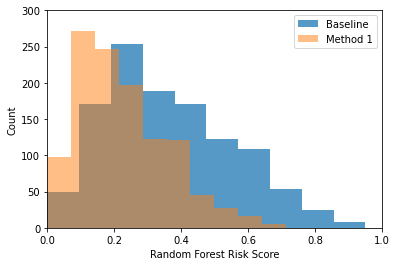

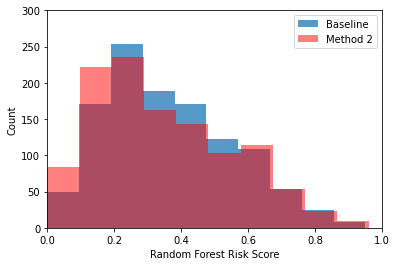

In [12]:
import matplotlib.pyplot as plt
plt.hist(risks0, alpha=0.75, label='Baseline')
plt.hist(risks1, alpha=0.5, label='Method 1')
plt.ylim([0, 300])
plt.xlim([0, 1])
plt.xlabel('Random Forest Risk Score')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.hist(risks0, alpha=0.75, label='Baseline')
plt.ylim([0, 300])
plt.xlim([0, 1])
plt.xlabel('Random Forest Risk Score')
plt.ylabel('Count')
plt.hist(risks2, alpha=0.5, label='Method 2', color='red')
plt.legend()
plt.show()

In [13]:
groups = pd.qcut(risks1, q=4, labels=['q1', 'q2', 'q3', 'q4'])
risk_groups = pd.DataFrame(tst_ids)
risk_groups['RiskScore'] = risks1
risk_groups['RiskQuartile'] = groups
risk_groups['Endpoint'] = tst_end
display(risk_groups[['RiskQuartile', 'RiskScore', 'Endpoint']].groupby('RiskQuartile').mean())
risk_groups.to_csv('A:/shared/P428/Ian_RF_Code/RF_Weighted_Probs_07152023.csv', index=False)

,RiskScore,Endpoint
RiskQuartile,,
q1,0.081527,0.024306
q2,0.158350,0.055749
q3,0.251477,0.121951
q4,0.416374,0.222222
